In [1]:
# импортируем необходимые библиотеки, классы и функции
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import log_loss
import shap
%config InlineBackend.figure_format = 'retina'

In [2]:
# загружаем исторический набор
data = pd.read_csv('Data/paribas_train.csv')
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [3]:
# смотрим количество наблюдений 
# и количество признаков
print(data.shape)

(114321, 133)


In [4]:
# удаляем переменную ID
data.drop('ID', axis=1, inplace=True)

In [5]:
# создаем пустые списки, в которые для каждой переменной 
# записываем количество уникальных значений, количество 
# пропусков, тип переменной
nunique_list = []
miss_list = []
type_list = []
for col in data.columns:
    nunique_list.append(data[col].nunique())
    miss_list.append(data[col].isnull().sum())
    type_list.append(data[col].dtypes)

In [6]:
# увеличиваем количество выводимых строк
pd.set_option('display.max_rows', 140)
# создаем датафрейм с информацией о количестве уникальных 
# значений, количестве пропусков, типе переменной
feat_labels = data.columns
summary = np.array([nunique_list, miss_list, type_list])
columns = ['nunique', 'missing', 'type']
results = pd.DataFrame(summary.T, 
                       index=feat_labels,
                       columns=columns)
results

,nunique,missing,type
target,2,0,int64
v1,64487,49832,float64
v2,64524,49796,float64
v3,3,3457,object
v4,64524,49796,float64
v5,65671,48624,float64
v6,64487,49832,float64
v7,64489,49832,float64
v8,65688,48619,float64
v9,64451,49851,float64


In [7]:
# импутируем пропуски
data.fillna(-9999, inplace=True)

In [8]:
# разбиваем набор на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('target', axis=1), 
    data['target'], 
    test_size=0.3,
    stratify=data['target'],
    random_state=42)

In [9]:
# увеличиваем количество отображаемых столбцов
pd.set_option('display.max_columns', 150)
# выводим матрицу корреляций
corr = X_train.corr()
corr.head()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
v1,1.000000,0.999315,0.999315,0.947288,1.000000,1.000000,0.947393,0.999619,0.022242,0.999924,0.022906,1.000000,0.005391,0.999924,0.998909,0.999315,1.000000,0.999772,0.999873,0.003925,0.983690,0.947393,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.027628,1.000000,0.947277,0.999772,-0.002806,0.999924,0.029099,1.000000,1.000000,0.999924,0.999315,1.000000,0.947393,0.999315,1.000000,0.022686,0.983640,0.999924,0.947393,1.000000,1.000000,0.999923,0.999314,1.000000,0.999315,0.019282,0.947393,0.999315,0.999873,1.000000,0.999924,0.998909,0.947059,0.021167,0.999924,0.999315,1.000000,0.998909,0.999619,0.947284,0.947308,1.000000,1.000000,0.983565,1.000000,0.946570,1.000000,0.947393,0.999924,0.999772,1.000000,1.000000,0.999772,1.000000,0.999772,0.946718,1.000000,0.999923,0.999315,0.972723,1.000000,1.000000,0.946671,0.999315,0.947289,0.947289,1.000000,0.017955,0.998909,0.999924,0.947278,0.999772,0.983614,0.999924,0.999873,0.999619,0.983640,0.947393,1.000000,1.000000,0.947289,0.011179,0.999772,0.998909
v2,0.999315,1.000000,1.000000,0.947958,0.999315,0.999315,0.948062,0.998934,0.022263,0.999239,0.022928,0.999315,0.005398,0.999239,0.998224,1.000000,0.999315,0.999086,0.999188,0.003971,0.984384,0.948063,0.999315,0.999315,0.999315,0.999315,0.999315,0.999315,0.027654,0.999315,0.947947,0.999086,-0.002894,0.999239,0.029122,0.999315,0.999315,0.999239,1.000000,0.999315,0.948062,1.000000,0.999315,0.022708,0.984335,0.999239,0.948062,0.999315,0.999315,0.999238,1.000000,0.999315,1.000000,0.019179,0.948063,1.000000,0.999188,0.999315,0.999239,0.998224,0.947729,0.021019,0.999239,1.000000,0.999315,0.998224,0.998934,0.947954,0.947978,0.999315,0.999315,0.984260,0.999315,0.947240,0.999315,0.948063,0.999239,0.999086,0.999315,0.999315,0.999086,0.999315,0.999086,0.947388,0.999315,0.999238,1.000000,0.973436,0.999315,0.999315,0.947340,1.000000,0.947959,0.947959,0.999315,0.017971,0.998224,0.999239,0.947949,0.999086,0.984309,0.999239,0.999188,0.998934,0.984334,0.948063,0.999315,0.999315,0.947959,0.011161,0.999086,0.998224
v4,0.999315,1.000000,1.000000,0.947958,0.999315,0.999315,0.948062,0.998934,0.022262,0.999239,0.022926,0.999315,0.005397,0.999239,0.998224,1.000000,0.999315,0.999086,0.999188,0.003972,0.984384,0.948062,0.999315,0.999315,0.999315,0.999315,0.999315,0.999315,0.027653,0.999315,0.947946,0.999086,-0.002901,0.999239,0.029121,0.999315,0.999315,0.999239,1.000000,0.999315,0.948062,1.000000,0.999315,0.022706,0.984334,0.999239,0.948062,0.999315,0.999315,0.999238,1.000000,0.999315,1.000000,0.019174,0.948062,1.000000,0.999188,0.999315,0.999239,0.998224,0.947728,0.021001,0.999239,1.000000,0.999315,0.998224,0.998934,0.947953,0.947977,0.999315,0.999315,0.984259,0.999315,0.947240,0.999315,0.948062,0.999239,0.999086,0.999315,0.999315,0.999086,0.999315,0.999086,0.947387,0.999315,0.999238,1.000000,0.973431,0.999315,0.999315,0.947340,1.000000,0.947958,0.947959,0.999315,0.017971,0.998224,0.999239,0.947948,0.999086,0.984309,0.999239,0.999188,0.998934,0.984334,0.948062,0.999315,0.999315,0.947959,0.011147,0.999086,0.998224
v5,0.947288,0.947958,0.947958,1.000000,0.947289,0.947288,0.999898,0.946916,0.021939,0.947214,0.022639,0.947288,0.005573,0.947214,0.946224,0.947958,0.947288,0.947066,0.947165,0.004786,0.964134,0.999898,0.947288,0.947288,0.947287,0.947289,0.947288,0.947288,0.027481,0.947289,1.000000,0.947065,-0.001230,0.947215,0.029157,0.947288,0.947288,0.947214,0.947958,0.947288,0.999898,0.947956,0.947288,0.022381,0.964085,0.947214,0.999898,0.947288,0.947289,0.947211,0.947958,0.947288,0.947958,0.017927,0.9998

In [10]:
# выделяем наиболее важные количественные признаки - те,
# у которых сумма корреляций с остальными была наименьшей
for col in corr.columns:
    print(col, np.abs(corr[col]).sum(axis=0))

v1 99.07717708072305
v2 99.05777616043284
v4 99.05772612658586
v5 96.02502215198527
v6 99.07718573726672
v7 99.07719145784912
v8 96.03328950623573
v9 99.0522707263313
v10 7.596528760721455
v11 99.07493693361216
v12 7.689686069140868
v13 99.07716443572401
v14 3.0082238312714606
v15 99.0749190261449
v16 98.98934825344708
v17 99.05771928176722
v18 99.07718093374955
v19 99.06449911188041
v20 99.07131668965765
v21 3.443874460960898
v23 98.28386173850268
v25 96.03330156369324
v26 99.07718520021575
v27 99.07719032810138
v28 99.07715082091724
v29 99.0771985189687
v32 99.07717453592275
v33 99.07715843417265
v34 8.38039996397207
v35 99.07718509665006
v36 96.02409035803208
v37 99.06449480326232
v38 1.9853484500152456
v39 99.07494816262043
v40 8.530656876911065
v41 99.07719023488859
v42 99.07718593505726
v43 99.07493130568636
v44 99.05773324455427
v45 99.07716714032733
v46 96.03327981736045
v48 99.05762859477491
v49 99.0771827634974
v50 7.666519716969931
v51 98.28255942165288
v53 99.07493606380942

In [11]:
# формируем список важных переменных на основе корреляций
corr_select_cols = ['v10', 'v12', 'v14', 'v21', 'v34', 'v38', 
                    'v40', 'v50', 'v62', 'v72', 'v114', 'v129']

In [12]:
# формируем массив индексов категориальных признаков
categorical_features_ind = np.where(X_train.dtypes != float)[0]
categorical_features_ind

array([  2,  21,  23,  29,  30,  37,  46,  51,  55,  61,  65,  70,  71,
        73,  74,  78,  90, 106, 109, 111, 112, 124, 128])

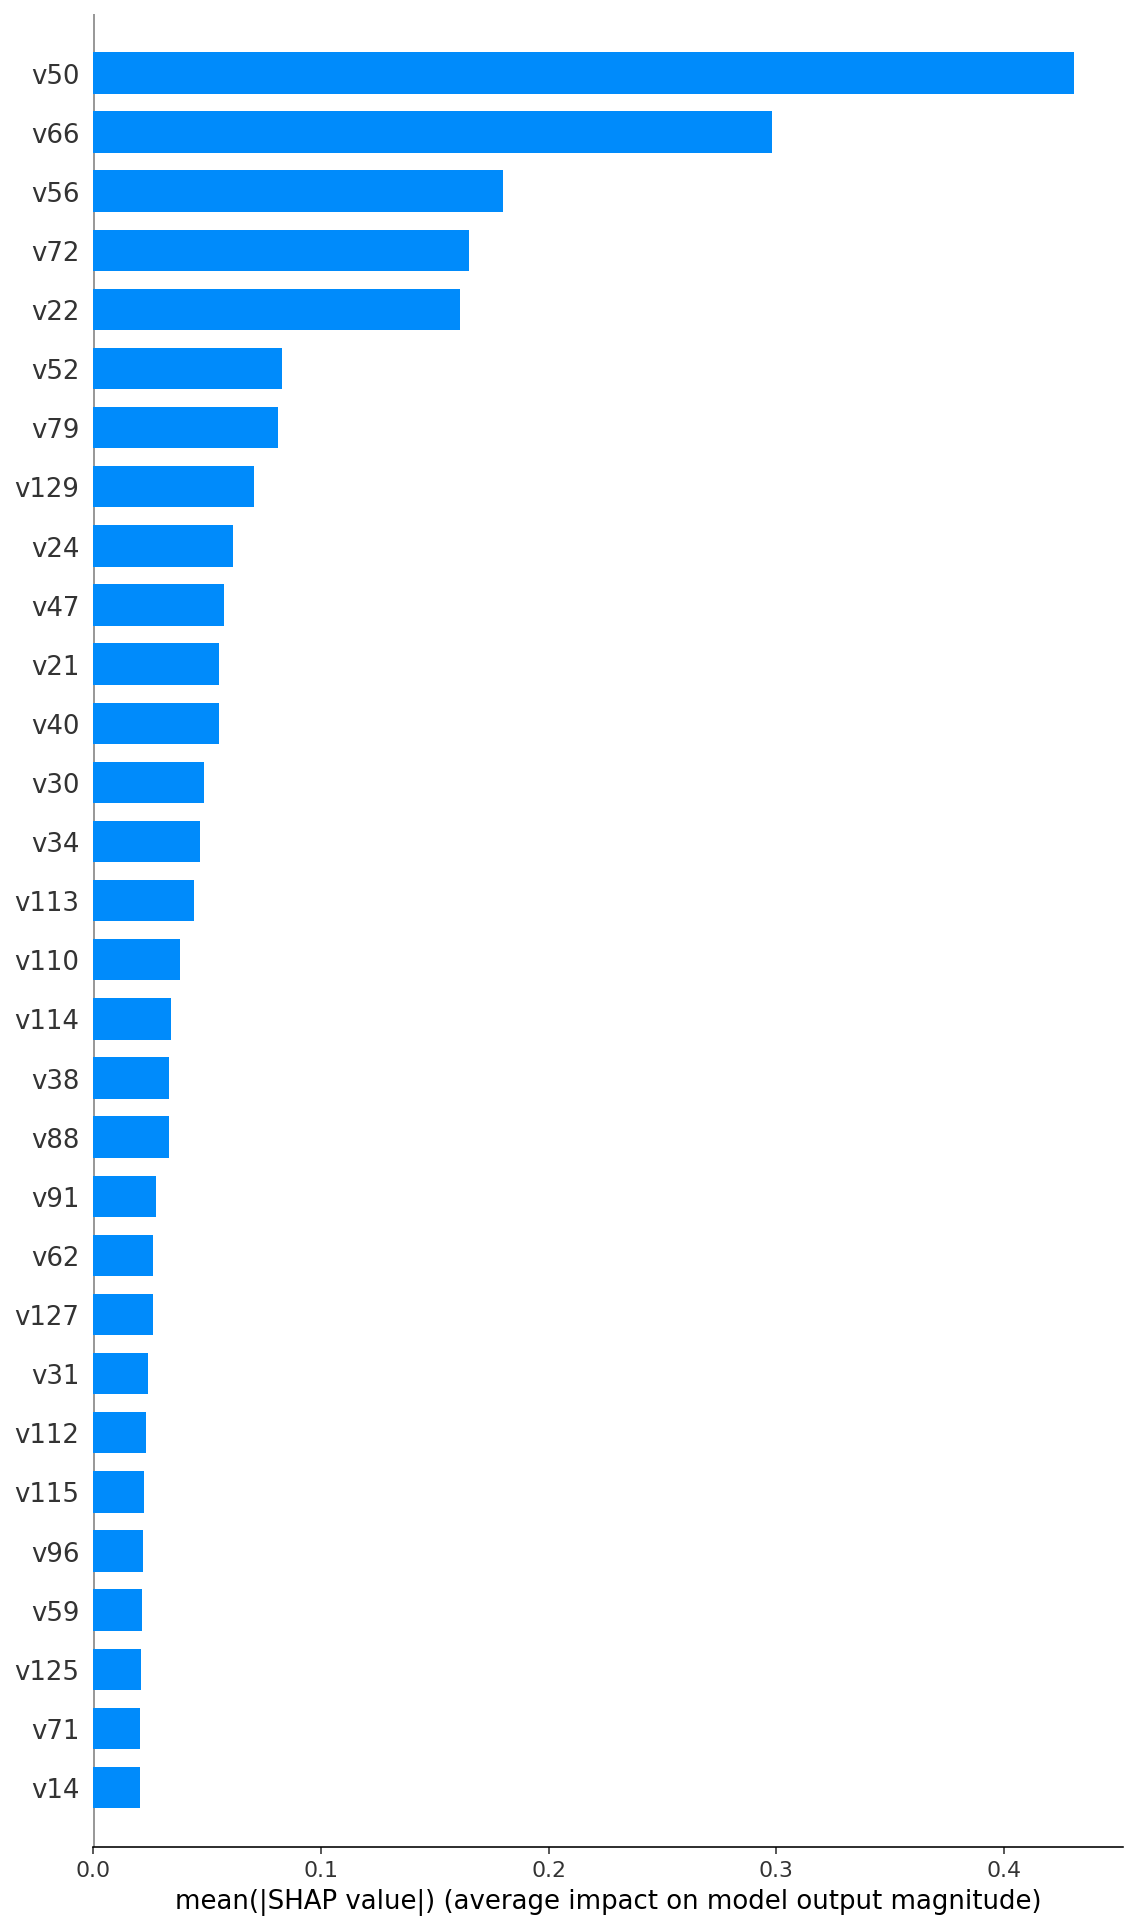

In [13]:
# формируем обучающий пул
train_pool = Pool(
    X_train, 
    y_train, 
    cat_features=categorical_features_ind)
# создаем экземпляр класса CatBoostClassifier
clf = CatBoostClassifier(learning_rate=0.08, 
                         iterations=1200,
                         random_strength=0.15,
                         random_seed=0,
                         model_size_reg=0.1,
                         logging_level='Silent')
# обучаем модель
clf.fit(train_pool)
# вычисляем важности по SHAP
shap_values = clf.get_feature_importance(train_pool, 'ShapValues')
shap_values = shap_values[:, :-1]
# выводим график 30 наиболее важных признаков по SHAP
shap.summary_plot(shap_values, X_train, plot_type='bar', max_display=30)

In [14]:
# формируем список важных переменных на основе SHAP
shap_select_cols = ['v66', 'v56', 'v22', 'v79', 'v52', 'v24', 
                    'v47', 'v113', 'v74', 'v31', 'v110', 'v30']

In [15]:
# объединяем два созданных списка в один
select_cols = corr_select_cols + shap_select_cols

In [16]:
# загружаем наборы
train = pd.read_csv('Data/paribas_train.csv')
test = pd.read_csv('Data/paribas_test.csv')

# формируем массив меток и массив признаков
labels = train.pop('target')

# сохраняем ID набора новых данных
test_id = test['ID']

# удаляем ID
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

# импутируем пропуски
train.fillna(-9999, inplace=True)
test.fillna(-9999, inplace=True)

# формируем новые массивы признаков
train = train[select_cols]
test = test[select_cols]

# добавляем парные взаимодействия на основе признаков 
# со строковыми и целочисленными значениями, 
# являющихся наиболее важными по SHAP
train['v129 + v66'] = train.apply(
    lambda x: f"{x['v129']} + {x['v66']}",
    axis=1)

train['v66 + v56'] = train.apply(
    lambda x: f"{x['v66']} + {x['v56']}",
    axis=1)

train['v56 + v22'] = train.apply(
    lambda x: f"{x['v56']} + {x['v22']}",
    axis=1)

train['v22 + v79'] = train.apply(
    lambda x: f"{x['v22']} + {x['v79']}",
    axis=1)

train['v79 + v52'] = train.apply(
    lambda x: f"{x['v79']} + {x['v52']}",
    axis=1)

train['v52 + v24'] = train.apply(
    lambda x: f"{x['v52']} + {x['v24']}",
    axis=1)

train['v24 + v47'] = train.apply(
    lambda x: f"{x['v24']} + {x['v47']}",
    axis=1)

train['v66 + v72'] = train.apply(
    lambda x: f"{x['v66']} + {x['v72']}",
    axis=1)

test['v129 + v66'] = test.apply(
    lambda x: f"{x['v129']} + {x['v66']}",
    axis=1)

test['v66 + v56'] = test.apply(
    lambda x: f"{x['v66']} + {x['v56']}",
    axis=1)

test['v56 + v22'] = test.apply(
    lambda x: f"{x['v56']} + {x['v22']}",
    axis=1)

test['v22 + v79'] = test.apply(
    lambda x: f"{x['v22']} + {x['v79']}",
    axis=1)

test['v79 + v52'] = test.apply(
    lambda x: f"{x['v79']} + {x['v52']}",
    axis=1)

test['v52 + v24'] = test.apply(
    lambda x: f"{x['v52']} + {x['v24']}",
    axis=1)

test['v24 + v47'] = test.apply(
    lambda x: f"{x['v24']} + {x['v47']}",
    axis=1)

test['v66 + v72'] = test.apply(
    lambda x: f"{x['v66']} + {x['v72']}",
    axis=1)

# формируем массив индексов категориальных признаков
cat_features_ids = np.where(train.dtypes != float)[0]

# формируем обучающий пул
train_pool = Pool(train, labels, cat_features=cat_features_ids)

# создаем экземпляр класса CatBoostClassifier
clf_full = CatBoostClassifier(learning_rate=0.06, 
                              iterations=1600,
                              random_strength=0.15,
                              model_size_reg=0.1,
                              random_seed=0,
                              logging_level='Silent')

# обучаем модель
clf_full.fit(train_pool)

# вычисляем вероятности
proba = clf_full.predict_proba(test)[:, 1]

# формируем посылку для Kaggle (10-е место на привате)
pd.DataFrame({'ID': test_id, 'PredictedProb': proba}).to_csv(
    'subm_paribas.csv', index=False)